# Create Southern boundary condition for Pb

In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np

from salishsea_tools import (
    nc_tools,
    viz_tools,
)
import datetime
import matplotlib
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import datetime
# import seaborn as sns
import csv
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

/ocean/brogalla/GEOTRACES/analysis-birgit/cmocean-master/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

#### Extended domain:

In [2]:
mesh = nc.Dataset('/ocean/brogalla/GEOTRACES/analysis-birgit/notebooks/ANHA12/ANHA12_mesh1.nc')
mesh_lon = mesh.variables['nav_lon']
mesh_lat = mesh.variables['nav_lat']
mesh_bathy = mesh.variables['hdept'][0]

In [3]:
mesh_lon = np.array(mesh_lon)
mesh_lat = np.array(mesh_lat)
mesh_bathy = np.array(mesh_bathy)

In [4]:
cond2 = (mesh_bathy > 0.1)
bathy_masked = np.ma.masked_where(cond2, mesh_bathy)

In [6]:
mask = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mask.nc')
tmask = mask.variables['tmask']
tmask = np.array(tmask[0,:,:,:])
mlons = mask.variables['nav_lon']
mlats = mask.variables['nav_lat']
mlons = np.array(mlons)
mlats = np.array(mlats)
cond = (tmask > 0.1) 
Z_masked = np.ma.masked_where(cond, tmask) 

### Read GEOTRACES extracted data:

In [7]:
file1 = 'GEOTRACES_IDP2017_v2_Discrete_Sample_Data_5024209a_1.nc'
folder= '/ocean/brogalla/GEOTRACES/data/'
data = nc.Dataset(folder+file1)

In [8]:
data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.7
    comment: ODV NetCDF Export File V2.0
    Creator: smieruch@webodv
    CreateTime: 2019-01-26T01:01:49
    Software: Web Ocean Data View 5.1.4 - web_server: 8 - 64 bit (Linux)
    Source: /var/www/html/ODV_Data/discrete_sample_data_2017_v2/GEOTRACES_IDP2017_v2_Discrete_Sample_Data.odv
    SourceLastModified: 2018-02-05T20:34:24
    DataField: GeneralField
    DataType: GeneralType
    dimensions(sizes): N_STATIONS(17), N_SAMPLES(262), STRING4(4), STRING20(20)
    variables(dimensions): |S1 metavar1(N_STATIONS,STRING4), |S1 metavar2(N_STATIONS,STRING20), |S1 metavar3(N_STATIONS), float32 longitude(N_STATIONS), float32 latitude(N_STATIONS), float64 date_time(N_STATIONS), float32 var1(N_STATIONS,N_SAMPLES), int8 var1_qc(N_STATIONS,N_SAMPLES), float32 var2(N_STATIONS,N_SAMPLES), int8 var2_qc(N_STATIONS,N_SAMPLES), float32 var3(N_STATIONS,N_SAMPLES), int8 var3_qc(N_STATIONS,N_SAM

In [9]:
lats_data = data.variables['latitude']
lons_data = data.variables['longitude']
depths_data = data.variables['var2']
time_data = data.variables['date_time']
Pb_diss = data.variables['var5'] # in pmol/kg
# Empty:
# Pb_tdiss = data.variables['var7'] # total dissolvable Pb (dissolved plus reactive particulate phase that dissolves while stored acidified)
# Pb_part = data.variables['var9'] # pmol/kg Concentration of total particulate lead determined by filtration from a water sampling bottle
# Pb_lpart = data.variables['var12'] # pmol/k Concentration of labile particulate lead determined by filtration from a water sampling bottle

In [10]:
time_data

<class 'netCDF4._netCDF4.Variable'>
float64 date_time(N_STATIONS)
    long_name: Decimal Gregorian Days of the station
    standard_name: time
    units: days since 2010-01-01 00:00:00 UTC
    comment: Relative Gregorian Days with decimal part
    C_format: %.5f
    FORTRAN_format: F12.5
    _FillValue: -10000000000.0
unlimited dimensions: 
current shape = (17,)
filling on

Time ranges from roughly mid 2010 to 2014

In [11]:
lats_data = np.array(lats_data)
lons_data = np.array(lons_data)
depths_data = np.array(depths_data)
time_data = np.array(time_data)
Pb_diss   = np.array(Pb_diss)

In [12]:
print(lons_data.shape)
print(lats_data.shape)
print(depths_data.shape)
print(time_data.shape)
print(Pb_diss.shape)

(17,)
(17,)
(17, 262)
(17,)
(17, 262)


#### Plot Cruise data:

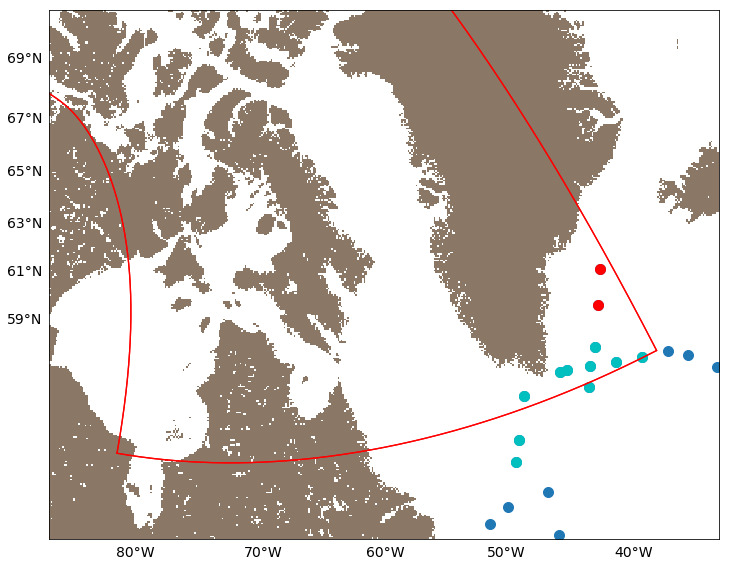

In [11]:
fig, ax1 = plt.subplots(figsize=(12,10))

proj2 = Basemap(projection='stere',lat_0 = 66, lon_0 = -60, resolution='i', width=3.8e6, height=3e6, ax=ax1)
proj2.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=14)
proj2.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=14)
proj2.drawlsmask(land_color = "#8b7765", ocean_color="#ffffff", resolution = 'h')

x_mesh, y_mesh = proj2(mesh_lon, mesh_lat)

x=x_mesh
y=y_mesh
res=10

# plot station locations:
x_data, y_data = proj2(lons_data-360, lats_data)
proj2.plot(x_data, y_data, '.', markersize=20)
proj2.plot(x_data[10:18], y_data[10:18], '.c', markersize=20)
proj2.plot(x_data[22], y_data[22], '.c', markersize=20)
proj2.plot(x_data[23], y_data[23], '.c', markersize=20)
proj2.plot(x_data[20:22], y_data[20:22], '.r', markersize=20)

# sub-domain:
l1=1100
proj2.plot(x[l1:2050,799]   , y[l1:2050,799]   , 'r-', lw=1.3)
proj2.plot(x[l1:2050,799].T , y[l1:2050,799].T , 'r-', lw=1.3)
proj2.plot(x[l1:2050,200]   , y[l1:2050,200]   , 'r-', lw=1.3)
proj2.plot(x[l1:2050,200].T , y[l1:2050,200].T , 'r-', lw=1.3)
proj2.plot(x[l1,200:799]    , y[l1,200:799]    , 'r-', lw=1.3)
proj2.plot(x[l1,200:799].T  , y[l1,200:799].T  , 'r-', lw=1.3)
proj2.plot(x[2050,200:799]    , y[2050,200:799]    , 'r-', lw=1.3)
proj2.plot(x[2050,200:799].T  , y[2050,200:799].T  , 'r-', lw=1.3)

Plot profiles of Pb measurements at the stations. First need to mask the fill values:

In [12]:
cond3 = ( Pb_diss > 1e5)
m1Pb_diss = np.ma.masked_where(cond3, Pb_diss)
cond4 = ( Pb_diss < -1e5 )
mPb_diss = np.ma.masked_where(cond4, m1Pb_diss)

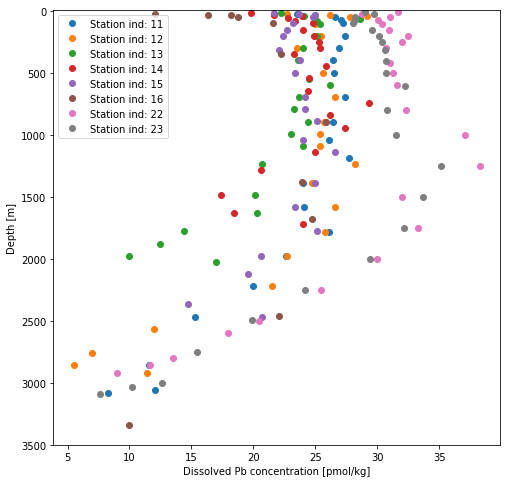

In [13]:
fig, ax1 = plt.subplots(figsize=(8,8))
stations = [11,12,13,14,15,16,22,23]
for i in stations:
    plt.plot(mPb_diss[i,:], depths_data[i,:], '.', markersize=12, label='Station ind: '+str(i))
plt.xlabel('Dissolved Pb concentration [pmol/kg]')
plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()
plt.ylim([3500, -10])
plt.legend()

Now, need to interpolate these onto the model boundary:

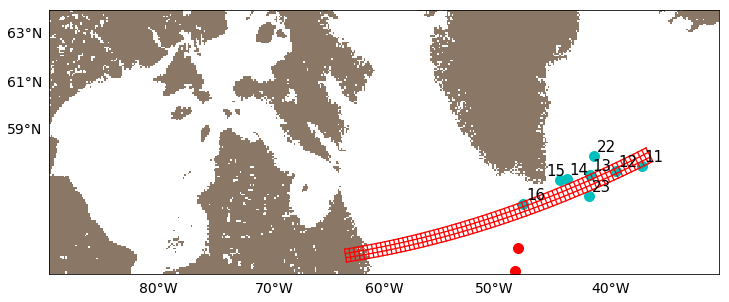

In [14]:
fig, ax1 = plt.subplots(figsize=(12,5))

proj2 = Basemap(projection='stere',lat_0 = 63, lon_0 = -60, resolution='i', width=3.8e6, height=1.5e6, ax=ax1)
proj2.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=14)
proj2.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=14)
proj2.drawlsmask(land_color = "#8b7765", ocean_color="#ffffff", resolution = 'h')

x_mesh, y_mesh = proj2(mesh_lon, mesh_lat)

# plot station locations:
x_data, y_data = proj2(lons_data-360, lats_data)
proj2.plot(x_data[10:16], y_data[10:16], '.c', markersize=20)
proj2.plot(x_data[16:18], y_data[16:18], '.r', markersize=20)
proj2.plot(x_data[22], y_data[22], '.c', markersize=20)
proj2.plot(x_data[23], y_data[23], '.c', markersize=20)

x1 = np.append(x_data[22], x_data[10:16])
x = np.append(x_data[23], x1)
y1 = np.append(y_data[22], y_data[10:16])
y = np.append(y_data[23], y1)
station=[23,22,11,12,13,14,15,16]
for i, (X, Y) in enumerate(zip(x, y), start=1):
    if station[i-1] == 15:
        ax1.annotate(str(station[i-1]), (X,Y), xytext=(-13,5), textcoords='offset points', fontsize=15)
    else:
        ax1.annotate(str(station[i-1]), (X,Y), xytext=(3,5), textcoords='offset points', fontsize=15)

# sub-domain:
l1=1100
proj2.plot(x_mesh[l1:l1+20:5,450:799:5]    , y_mesh[l1:l1+20:5,450:799:5]    , 'r-', lw=1.3);
proj2.plot(x_mesh[l1:l1+20:5,450:799:5].T  , y_mesh[l1:l1+20:5,450:799:5].T  , 'r-', lw=1.3);

Boundary thickness is 20

In [15]:
boundary_lats = mesh_lat[l1:l1+20,450:799]
boundary_lons = mesh_lon[l1:l1+20,450:799]
print(boundary_lats.shape)
print(boundary_lons.shape)

(20, 349)
(20, 349)


Plot profiles along the boundary (from left to right):

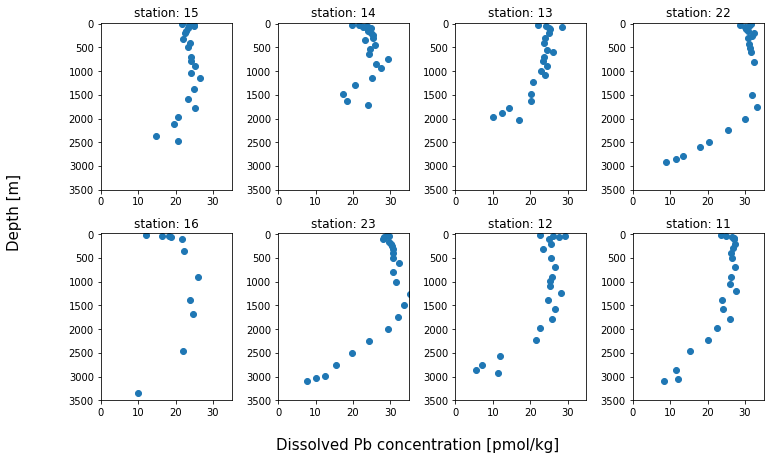

In [16]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(10, 6))
#                         subplot_kw={'xticklabels': [], 'yticklabels': []})

# fig.subplots_adjust(left=0.03, right=0.97, hspace=0.3, wspace=0.05)
stations=[15,14,13,22,16,23,12,11]
i = 0
for ax in axs.flat:
    ax.plot(mPb_diss[stations[i],:], depths_data[stations[i],:], '.', markersize=12)
    ax.set_title('station: '+str(stations[i]))
    ax.invert_yaxis()
    ax.set_ylim(3500,-20)
    ax.set_xlim(0, 35)
    i += 1
    
fig.text(0.5, -0.04, 'Dissolved Pb concentration [pmol/kg]', ha='center', va='center',fontsize=15)
fig.text(-0.06, 0.5, 'Depth [m]', ha='center', va='center', rotation='vertical', fontsize=15)

plt.tight_layout()

#### Create one vertical profile of dissolved Pb for the southern boundary condition:

Interpolate the Pb data at the boundary. First interpolate the profiles.

In [17]:
def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    """

    if x.ndim != 1:
        raise ValueError#, "smooth only accepts 1 dimension arrays."

    if x.size < window_len:
        raise ValueError#, "Input vector needs to be bigger than window size."


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError#, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'"

    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y

In [40]:
# create one array of depths and Pb concentrations for stations at southern boundary:
stations = [11,12,13,14,15,16,22,23]
Pb_dtotal = np.array([])
depth_total = np.array([])
for i in stations:
    depth_total = np.append(depths_data[i,:], depth_total)
    Pb_dtotal   = np.append(mPb_diss[i,:], Pb_dtotal)

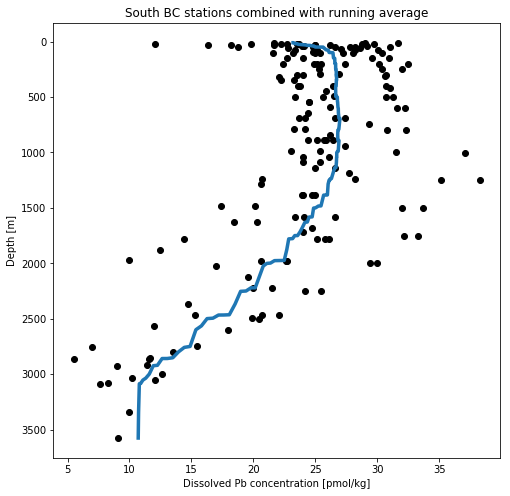

In [77]:
fig, ax1 = plt.subplots(figsize=(8,8))

# remove masked components:
masked_array1 = np.ma.masked_where((Pb_dtotal > 1e5), Pb_dtotal)
masked_array = np.ma.masked_where((Pb_dtotal < -1e5), masked_array1)
x = Pb_dtotal[~masked_array.mask]
y = depth_total[~masked_array.mask]
b = sorted((i,j) for i,j in zip(y,x))
y1, x1 = zip(*b)
plt.plot(x1, y1, '.k', markersize=12)

# moving average:
x1 = np.array(x1)
y1 = np.array(y1)
x1_ave = smooth(x1, window_len=25, window='flat')
x1_smoothed = x1_ave[12:-12]
x1_ave2 = smooth(x1_smoothed, window_len=15, window='flat')
x1_smoothed2 = x1_ave2[7:-7]
plt.plot(x1_smoothed2, y1, linewidth=3.5)

plt.title('South BC stations combined with running average')
plt.xlabel('Dissolved Pb concentration [pmol/kg]')
plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()

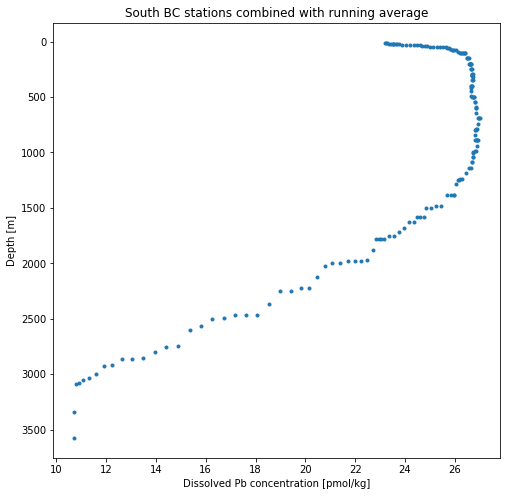

In [78]:
fig, ax1 = plt.subplots(figsize=(8,8))
plt.plot(x1_smoothed2, y1, '.') #linewidth=3.5)

plt.title('South BC stations combined with running average')
plt.xlabel('Dissolved Pb concentration [pmol/kg]')
plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()

Now interpolate to the model grid depths:

In [79]:
mesh = '/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12/ANHA12-EXH006_5d_gridT_y2002m01d05.nc'
m = nc.Dataset(mesh)
mdepth = m.variables['deptht']
mlons = m.variables['nav_lon']
mlats = m.variables['nav_lat']
mdepth = np.array(mdepth)
mlons = np.array(mlons)
mlats = np.array(mlats)

In [80]:
print('Original size: ' + str(y1.shape))
print('New size: ' + str(mdepth.shape))

Original size: (170,)
New size: (50,)


In [89]:
def interp_depths(var, mdepth, fill):
    # constant extrapolation for values outside of the range
    from scipy import interpolate
    
    interp_var = np.empty(mdepth.shape)
    x = y1

    y = var[:]
    f = interpolate.interp1d(x, y, fill_value = fill)
    interp_var[:] = f(mdepth)
    return interp_var

In [90]:
Pb_diss_int = interp_depths(x1_smoothed2, mdepth, fill='extrapolate')
Pb_diss_int = np.array(Pb_diss_int)

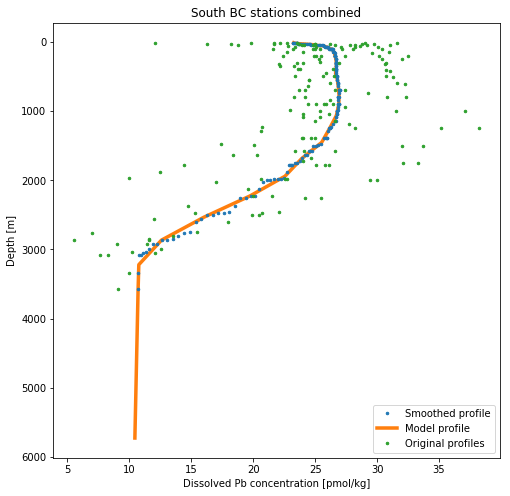

In [91]:
fig, ax1 = plt.subplots(figsize=(8,8))
plt.plot(x1_smoothed2, y1, '.', markersize=5, zorder=2, label = 'Smoothed profile')
plt.plot(Pb_diss_int, mdepth, '-', linewidth=3.5, zorder=1, label = 'Model profile')
plt.plot(x1, y1, '.', markersize=5, label = 'Original profiles')

plt.title('South BC stations combined')
plt.xlabel('Dissolved Pb concentration [pmol/kg]')
plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()
plt.legend()

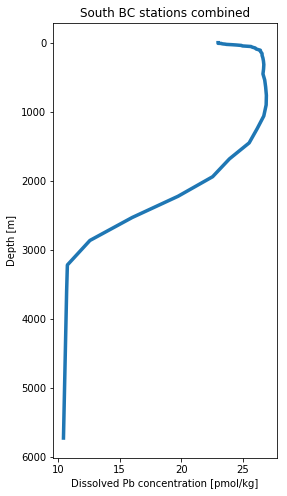

In [98]:
fig, ax1 = plt.subplots(figsize=(4,8))
plt.plot(Pb_diss_int, mdepth, '-', linewidth=3.5, zorder=1, label = 'Model profile')

plt.title('South BC stations combined')
plt.xlabel('Dissolved Pb concentration [pmol/kg]')
plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()

Now I need to add this profile for every gridpoint on the boundary.

### Boundary condition:

In [93]:
print('Boundary latitudes shape: ', boundary_lats.shape)
print('Boundary longitudes shape: ',boundary_lons.shape)

Boundary latitudes shape:  (20, 349)
Boundary longitudes shape:  (20, 349)


In [94]:
print('final dimension should be 1D of length:', len(boundary_lats[0,:])*len(boundary_lats[:,0]))

final dimension should be 1D of length: 6980


Based on one layer:

In [95]:
Pb_diss_int

array([        -inf,         -inf,         -inf,         -inf,
               -inf,         -inf,         -inf,         -inf,
        23.26281655,  23.28483657,  23.31918097,  23.41028355,
        23.57683408,  23.6910087 ,  24.12201495,  24.51822282,
        24.89083902,  24.97654516,  25.67175831,  25.78709318,
        26.02179267,  26.09787639,  26.4337081 ,  26.45380734,
        26.56837573,  26.57908735,  26.64221195,  26.68674929,
        26.71664334,  26.69616936,  26.64749625,  26.78926381,
        26.86530673,  26.92442102,  26.90632242,  26.71375166,
        26.1787912 ,  25.52508362,  23.92133271,  22.56015494,
        19.75442738,  16.02458365,  12.59298346,  10.76281612,
        10.70276827,  10.65508677,  10.60532073,  10.55370674,
        10.50047377,  10.44583746])

In [96]:
Pb_diss_int[0:8] = 23

In [97]:
Pb_diss_int

array([ 23.        ,  23.        ,  23.        ,  23.        ,
        23.        ,  23.        ,  23.        ,  23.        ,
        23.26281655,  23.28483657,  23.31918097,  23.41028355,
        23.57683408,  23.6910087 ,  24.12201495,  24.51822282,
        24.89083902,  24.97654516,  25.67175831,  25.78709318,
        26.02179267,  26.09787639,  26.4337081 ,  26.45380734,
        26.56837573,  26.57908735,  26.64221195,  26.68674929,
        26.71664334,  26.69616936,  26.64749625,  26.78926381,
        26.86530673,  26.92442102,  26.90632242,  26.71375166,
        26.1787912 ,  25.52508362,  23.92133271,  22.56015494,
        19.75442738,  16.02458365,  12.59298346,  10.76281612,
        10.70276827,  10.65508677,  10.60532073,  10.55370674,
        10.50047377,  10.44583746])

In [99]:
dPb_BC = np.zeros((50,6980))
for i in range(0,6980):
    dPb_BC[:,i] = Pb_diss_int

In [100]:
dPb_BC.shape

(50, 6980)

In [101]:
dPb_SBC = np.reshape(dPb_BC, (1,50,1,6980))

## Create new NetCDF file

In [102]:
# Load structure from sample dataset:
BZ = mask.dimensions['z']

In [103]:
# Setup the new NetCDF file:
ncd = nc.Dataset('Pb_South_OBC_20181213.nc', 'w', zlib=True)
nc_tools.init_dataset_attrs(
    ncd,
    title='Pb Southern OBC',
    notebook_name='create_OBC',
    nc_filepath='./create_OBC.nc',
    comment='Southern boundary')

ncd.createDimension('x', len(boundary_lats[0,:])*len(boundary_lats[:,0]))
ncd.createDimension('y',1)
ncd.createDimension('z',len(BZ))
ncd.createDimension('t',None)

file format: NETCDF4
Conventions: CF-1.6
title: Pb Southern OBC
institution: Dept of Earth, Ocean & Atmospheric Sciences, University of British Columbia
source: https://bitbucket.org/ccar-modeling/analysis-birgit/src/tip/notebooks/ANHA12/BC/create_OBC.ipynb
references: REQUIRED
history: [2018-12-18 11:01:26] Created netCDF4 zlib=True dataset.
comment: Southern boundary


<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 't', size = 0

In [104]:
dPb = ncd.createVariable('dPb', 'float64', ('t','z','y','x'))
dPb.units = 'dissolv. Pb'
dPb.long_name = 'dPb'
dPb[:] = dPb_SBC

In [105]:
nc_tools.check_dataset_attrs(ncd)
ncd.close()

Missing value for dataset attribute: references
